In [1]:
import numpy as np
rand = np.random.RandomState (42)
x = rand.randint (100, size = 10)
print (x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x [ind]

array([71, 86, 60])

In [4]:
ind = np.array ([[3, 7], [4, 5]])
x [ind]

array([[71, 86],
       [60, 20]])

In [5]:
x = np.arange (12).reshape (3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array ([0, 1, 2])
col = np.array ([2, 1, 3])
x [row, col]

array([ 2,  5, 11])

In [7]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [9]:
print (x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
mask = np.array ([1, 0, 1, 0], dtype = bool)
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [13]:
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]
x = rand.multivariate_normal (mean, cov, 100)
x.shape

(100, 2)

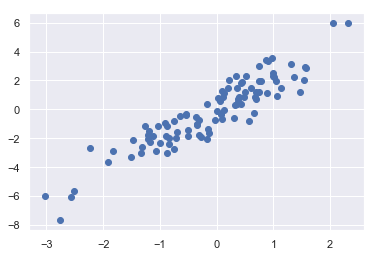

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set ()
plt.scatter (x [:, 0], x[:, 1]);

In [17]:
indices = np.random.choice (x.shape[0], 20, replace = False)
indices

array([61, 10, 70, 26, 62, 46,  1,  8, 50, 45, 35, 19, 21, 81, 47, 17, 30,
       92, 29, 84])

In [18]:
selection = x [indices]
selection.shape

(20, 2)

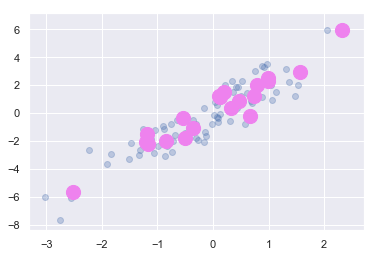

In [25]:
plt.scatter(x[:, 0], x[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection [:, 1],
           facecolor = 'Violet', s=200)

In [26]:
x = np.arange (10)
i = np.array ([2, 1, 8, 4])
x [i] = 99
print (x)

[ 0 99 99  3 99  5  6  7 99  9]


In [27]:
x [i] -= 10
print (x)

[ 0 89 89  3 89  5  6  7 89  9]


In [28]:
x = np.zeros (10)
x[[0, 0]] = [4, 6]
print (x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
i = [2, 3, 3, 4, 4, 4]
x [i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [30]:
x = np.zeros (10)
np.add.at (x, i, 1)
print (x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [31]:
np.random.seed (42)
x = np.random.randn (100)
bins = np.linspace (-5, 5, 20)
counts = np.zeros_like (bins)
i = np.searchsorted (bins, x)
np.add.at (counts, i, 1)

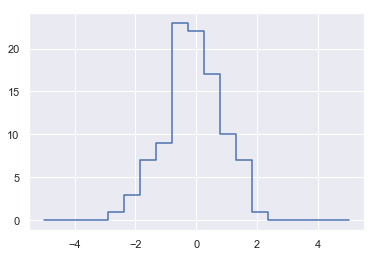

In [32]:
plt.plot (bins, counts, linestyle = 'steps');

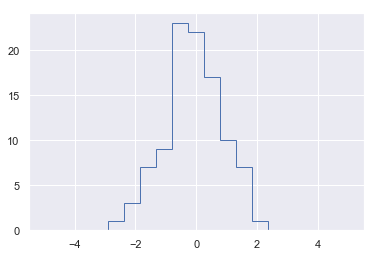

In [34]:
plt.hist (x, bins, histtype = 'step');

In [35]:
print ("Numpy routine:")

Numpy routine:


In [36]:
%timeit counts, edges = np.histogram (x, bins)

18.5 µs ± 345 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
print ("custom routine:")
%timeit np.add.at (counts, np.searchsorted (bins, x), 1)

custom routine:
13.1 µs ± 590 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
x = np.random.randn (1000000)
print ("Numpy routine:")
%timeit counts, edges = np.histogram (x, bins)
print ("custom routine:")
%timeit np.add.at (counts, np.searchsorted (bins, x), 1)

Numpy routine:
62.5 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
custom routine:
107 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
